In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup

chrome_options = webdriver.ChromeOptions()

url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome(service=Service('./chromedriver'), options=chrome_options)
driver.get(url)

In [6]:
driver.get(url)

In [7]:
sido = driver.find_element(By.ID, "SIDO_NM0")
sido

<selenium.webdriver.remote.webelement.WebElement (session="6d13a8b789d65cba897793c24f69622c", element="4793bf6c-53c5-4b22-9d11-019b992a82d0")>

In [8]:
sido_list = sido.find_elements(By.TAG_NAME, "option")
sido_list

[<selenium.webdriver.remote.webelement.WebElement (session="6d13a8b789d65cba897793c24f69622c", element="e2b1e943-800f-4441-b46d-6abf5c06ad8c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d13a8b789d65cba897793c24f69622c", element="67fd34ce-4df1-480b-9335-ce798021cd83")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d13a8b789d65cba897793c24f69622c", element="0a90b53b-5690-47b1-ae2b-bcf9ac7fad9e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d13a8b789d65cba897793c24f69622c", element="b63e83ef-6ca5-4be1-b8aa-b1b5ec6b697c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d13a8b789d65cba897793c24f69622c", element="acdf340a-f9fb-4838-9284-57dbdd74f4df")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d13a8b789d65cba897793c24f69622c", element="bde60402-5ce9-4bef-a5d4-d1d5fdaae8c2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6d13a8b789d65cba897793c24f69622c", element="d77f13ee-0334-49e9-8df1-94

In [9]:
sido_list[1].get_attribute("value")

'서울특별시'

In [10]:
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [11]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [12]:
print(sido_names[1])
sido.send_keys(sido_names[1])

부산광역시


In [13]:
print(sido_names[0])
sido.send_keys(sido_names[0])

서울특별시


In [14]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove("")

print(len(gu_names))
print(gu_names)

25
['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [15]:
gu.send_keys(gu_names[15])

In [16]:
import time
from tqdm.notebook import tqdm
#from tqdm import tqdm as tqdm


for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    time.sleep(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(time_to_wait=3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [18]:
driver.find_element(By.CSS_SELECTOR, "#glopopd_excel").click()

In [19]:
for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(time_to_wait=3)
    
    excel = driver.find_element(By.CSS_SELECTOR, "#glopopd_excel").click()

  0%|          | 0/25 [00:00<?, ?it/s]

In [20]:
driver.close()

In [120]:
import pandas as pd
from glob import glob

In [121]:
glob("./지역_*.xls")

['./지역_위치별(주유소) (20).xls',
 './지역_위치별(주유소) (9).xls',
 './지역_위치별(주유소) (15).xls',
 './지역_위치별(주유소) (14).xls',
 './지역_위치별(주유소) (8).xls',
 './지역_위치별(주유소) (4).xls',
 './지역_위치별(주유소) (22).xls',
 './지역_위치별(주유소) (5).xls',
 './지역_위치별(주유소) (3).xls',
 './지역_위치별(주유소) (24).xls',
 './지역_위치별(주유소) (21).xls',
 './지역_위치별(주유소) (1).xls',
 './지역_위치별(주유소) (11).xls',
 './지역_위치별(주유소) (18).xls',
 './지역_위치별(주유소) (7).xls',
 './지역_위치별(주유소) (6).xls',
 './지역_위치별(주유소) (19).xls',
 './지역_위치별(주유소) (16).xls',
 './지역_위치별(주유소) (2).xls',
 './지역_위치별(주유소).xls',
 './지역_위치별(주유소) (12).xls',
 './지역_위치별(주유소) (17).xls',
 './지역_위치별(주유소) (23).xls',
 './지역_위치별(주유소) (25).xls',
 './지역_위치별(주유소) (13).xls',
 './지역_위치별(주유소) (10).xls']

In [122]:
file_list = glob("./지역_*.xls")
file_list[:5]

['./지역_위치별(주유소) (20).xls',
 './지역_위치별(주유소) (9).xls',
 './지역_위치별(주유소) (15).xls',
 './지역_위치별(주유소) (14).xls',
 './지역_위치별(주유소) (8).xls']

In [123]:
tmp = pd.read_excel(file_list[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
26,서울특별시,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,GS칼텍스,02-785-8201,N,2360,2199,2360,1750
27,서울특별시,한일주유소,서울 영등포구 도림로 486 (문래동3가),SK에너지,02-2679-1794,N,-,-,-,-


In [124]:
tmp_list = []

for file in file_list:
    tmp = pd.read_excel(file, header=2)
    tmp_list.append(tmp)

gas_data = pd.concat(tmp_list)
gas_data

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)MS에너지,서울 영등포구 대림로 230,현대오일뱅크,02-844-5151,N,-,1595,1797,-
1,서울특별시,도림주유소,서울 영등포구 도림로 343 (도림동),알뜰주유소,02-835-8881,Y,-,1595,1797,-
2,서울특별시,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),GS칼텍스,02-841-8780,Y,-,1595,1787,-
3,서울특별시,성락주유소,서울 영등포구 가마산로 414 (신길동),S-OIL,02-842-6148,Y,-,1595,1787,-
4,서울특별시,영등포제일셀프주유소,서울 영등포구 가마산로 379,현대오일뱅크,02-847-5151,Y,-,1595,1777,-
...,...,...,...,...,...,...,...,...,...,...
11,서울특별시,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),GS칼텍스,02-905-4441,Y,-,1655,1825,-
12,서울특별시,현대오일뱅크㈜직영 영신주유소,서울 도봉구 방학로 151,현대오일뱅크,02-956-5152,N,2054,1657,1827,1769
13,서울특별시,노원교주유소,서울 도봉구 마들로 776 (도봉동),현대오일뱅크,02-956-5189,Y,-,1676,1826,1560
14,서울특별시,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),현대오일뱅크,02-998-9704,Y,-,1698,1858,1650


In [125]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      466 non-null    object
 1   상호      466 non-null    object
 2   주소      466 non-null    object
 3   상표      466 non-null    object
 4   전화번호    466 non-null    object
 5   셀프여부    466 non-null    object
 6   고급휘발유   466 non-null    object
 7   휘발유     466 non-null    object
 8   경유      466 non-null    object
 9   실내등유    466 non-null    object
dtypes: object(10)
memory usage: 40.0+ KB


In [126]:
gas_data = pd.DataFrame({
    "상호": gas_data["상호"],
    "주소": gas_data["주소"],
    "가격": gas_data["휘발유"],
    "셀프": gas_data["셀프여부"],
    "상표": gas_data["상표"],
})
gas_data.tail()

,상호,주소,가격,셀프,상표
11,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1655,Y,GS칼텍스
12,현대오일뱅크㈜직영 영신주유소,서울 도봉구 방학로 151,1657,N,현대오일뱅크
13,노원교주유소,서울 도봉구 마들로 776 (도봉동),1676,Y,현대오일뱅크
14,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),1698,Y,현대오일뱅크
15,오복주유소,서울 도봉구 방학로 43,1756,Y,S-OIL


In [127]:
gas_data["구"] = [address.split()[1] for address in gas_data["주소"]]
gas_data

,상호,주소,가격,셀프,상표,구
0,(주)MS에너지,서울 영등포구 대림로 230,1595,N,현대오일뱅크,영등포구
1,도림주유소,서울 영등포구 도림로 343 (도림동),1595,Y,알뜰주유소,영등포구
2,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1595,Y,GS칼텍스,영등포구
3,성락주유소,서울 영등포구 가마산로 414 (신길동),1595,Y,S-OIL,영등포구
4,영등포제일셀프주유소,서울 영등포구 가마산로 379,1595,Y,현대오일뱅크,영등포구
...,...,...,...,...,...,...
11,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1655,Y,GS칼텍스,도봉구
12,현대오일뱅크㈜직영 영신주유소,서울 도봉구 방학로 151,1657,N,현대오일뱅크,도봉구
13,노원교주유소,서울 도봉구 마들로 776 (도봉동),1676,Y,현대오일뱅크,도봉구
14,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),1698,Y,현대오일뱅크,도봉구


In [128]:
gas_data["구"].unique(), len(gas_data["구"].unique())

(array(['영등포구', '노원구', '서초구', '서대문구', '금천구', '강서구', '은평구', '관악구', '강북구',
        '중구', '용산구', '강남구', '동대문구', '송파구', '구로구', '광진구', '양천구', '성동구',
        '강동구', '동작구', '성북구', '종로구', '중랑구', '마포구', '도봉구'], dtype=object),
 25)

In [129]:
gas_data[gas_data["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
30,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
17,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),-,N,현대오일뱅크,동대문구
13,현대오일뱅크㈜직영 장호셀프주유소,서울 광진구 자양로 37 (자양동),-,Y,현대오일뱅크,광진구
14,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
15,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
24,평화주유소,서울 양천구 안양천로 657 (신정동),-,N,SK에너지,양천구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구


In [130]:
gas_data = gas_data[gas_data["가격"] != "-"]
gas_data.head()

,상호,주소,가격,셀프,상표,구
0,(주)MS에너지,서울 영등포구 대림로 230,1595,N,현대오일뱅크,영등포구
1,도림주유소,서울 영등포구 도림로 343 (도림동),1595,Y,알뜰주유소,영등포구
2,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1595,Y,GS칼텍스,영등포구
3,성락주유소,서울 영등포구 가마산로 414 (신길동),1595,Y,S-OIL,영등포구
4,영등포제일셀프주유소,서울 영등포구 가마산로 379,1595,Y,현대오일뱅크,영등포구


In [131]:
gas_data["가격"] = gas_data["가격"].astype("float")

/tmp/ipykernel_91093/3157188394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas_data["가격"] = gas_data["가격"].astype("float")


In [132]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      456 non-null    object 
 1   주소      456 non-null    object 
 2   가격      456 non-null    float64
 3   셀프      456 non-null    object 
 4   상표      456 non-null    object 
 5   구       456 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.9+ KB


In [133]:
gas_data

,상호,주소,가격,셀프,상표,구
0,(주)MS에너지,서울 영등포구 대림로 230,1595.0,N,현대오일뱅크,영등포구
1,도림주유소,서울 영등포구 도림로 343 (도림동),1595.0,Y,알뜰주유소,영등포구
2,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1595.0,Y,GS칼텍스,영등포구
3,성락주유소,서울 영등포구 가마산로 414 (신길동),1595.0,Y,S-OIL,영등포구
4,영등포제일셀프주유소,서울 영등포구 가마산로 379,1595.0,Y,현대오일뱅크,영등포구
...,...,...,...,...,...,...
11,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1655.0,Y,GS칼텍스,도봉구
12,현대오일뱅크㈜직영 영신주유소,서울 도봉구 방학로 151,1657.0,N,현대오일뱅크,도봉구
13,노원교주유소,서울 도봉구 마들로 776 (도봉동),1676.0,Y,현대오일뱅크,도봉구
14,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),1698.0,Y,현대오일뱅크,도봉구


In [134]:
gas_data.reset_index(inplace=True)
gas_data.head()

,index,상호,주소,가격,셀프,상표,구
0,0,(주)MS에너지,서울 영등포구 대림로 230,1595.0,N,현대오일뱅크,영등포구
1,1,도림주유소,서울 영등포구 도림로 343 (도림동),1595.0,Y,알뜰주유소,영등포구
2,2,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1595.0,Y,GS칼텍스,영등포구
3,3,성락주유소,서울 영등포구 가마산로 414 (신길동),1595.0,Y,S-OIL,영등포구
4,4,영등포제일셀프주유소,서울 영등포구 가마산로 379,1595.0,Y,현대오일뱅크,영등포구


In [135]:
del gas_data["index"]
gas_data.head()

,상호,주소,가격,셀프,상표,구
0,(주)MS에너지,서울 영등포구 대림로 230,1595.0,N,현대오일뱅크,영등포구
1,도림주유소,서울 영등포구 도림로 343 (도림동),1595.0,Y,알뜰주유소,영등포구
2,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1595.0,Y,GS칼텍스,영등포구
3,성락주유소,서울 영등포구 가마산로 414 (신길동),1595.0,Y,S-OIL,영등포구
4,영등포제일셀프주유소,서울 영등포구 가마산로 379,1595.0,Y,현대오일뱅크,영등포구


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

plt.rc('font', family='NanumGothiccoding')

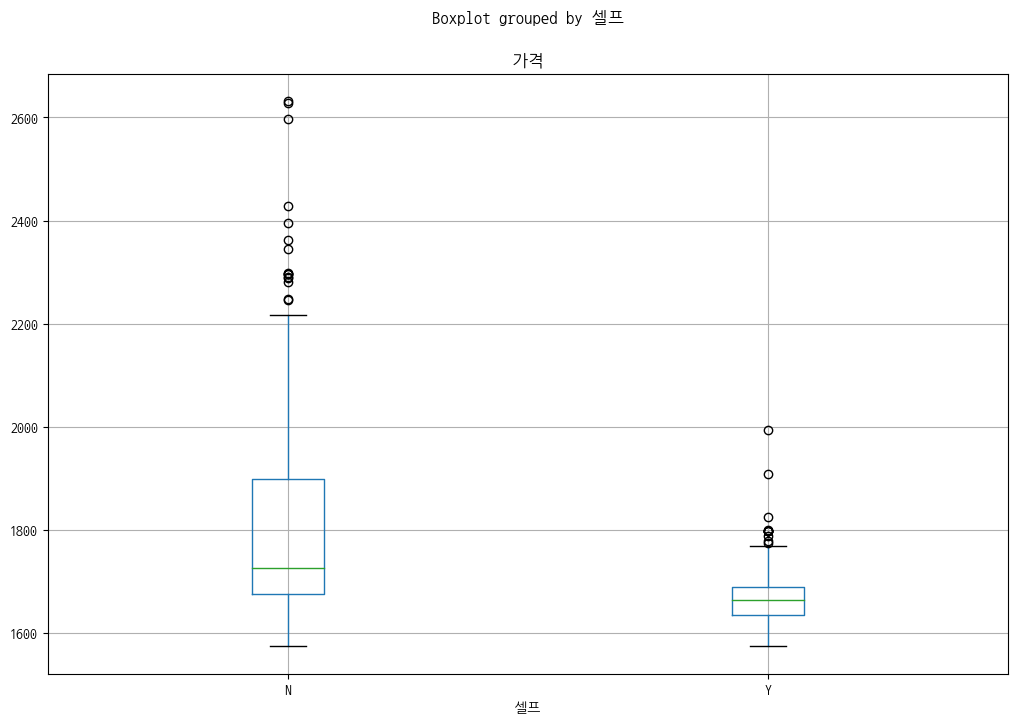

In [137]:
gas_data.boxplot(column="가격", by="셀프", figsize=(12, 8));

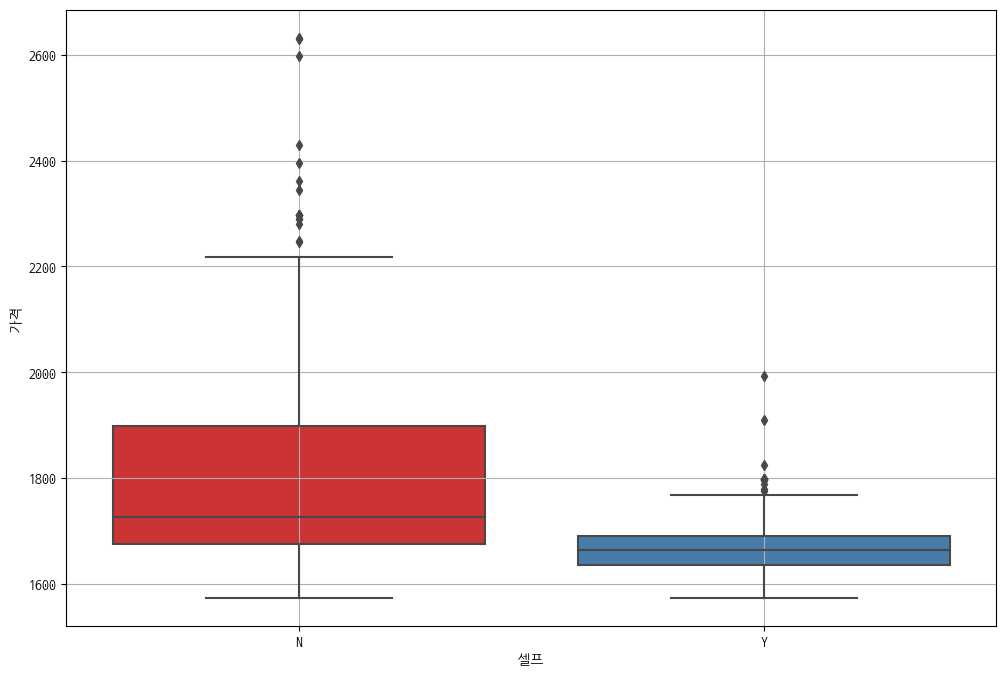

In [138]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=gas_data, palette="Set1")
plt.grid(True)
plt.show()

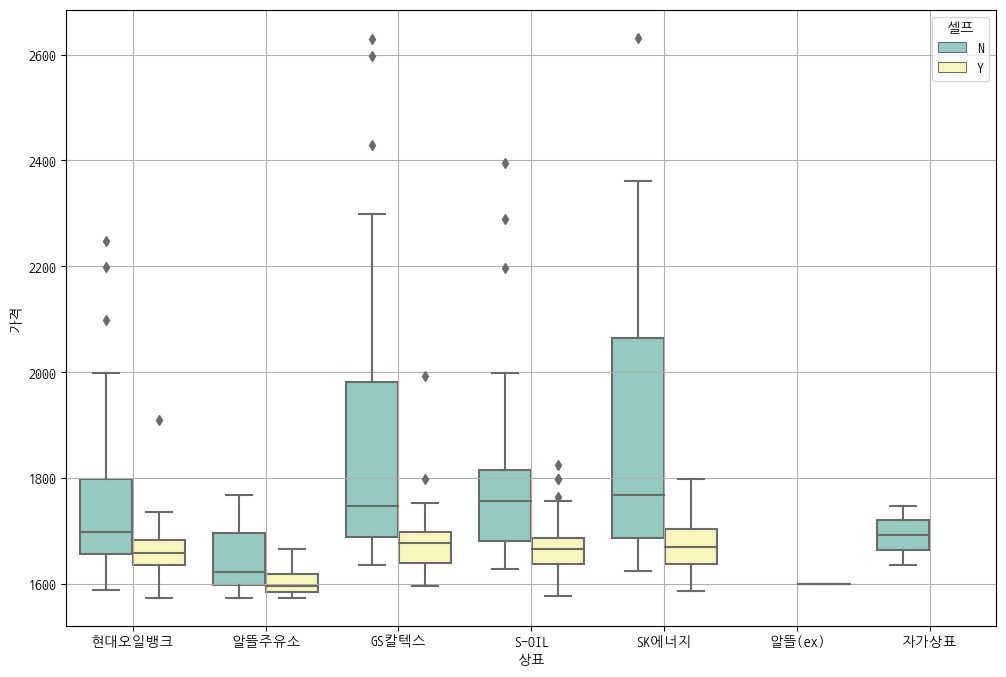

In [139]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=gas_data, palette="Set3")
plt.grid(True)
plt.show()

In [140]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [141]:
gas_data.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
182,서남주유소,서울 중구 통일로 30,2632.0,N,SK에너지,중구
194,서계주유소,서울 용산구 청파로 367 (청파동),2629.0,N,GS칼텍스,용산구
228,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
181,필동주유소,서울 중구 퇴계로 196 (필동2가),2429.0,N,GS칼텍스,중구
71,양재최고주유소,서울 서초구 매헌로 72 (양재동),2395.0,N,S-OIL,서초구
227,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구
226,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
295,구로주유소,서울 구로구 구로동로 137 (구로동),2298.0,N,GS칼텍스,구로구
192,한남지점,서울 용산구 한남대로21길 4 (한남동),2297.0,N,SK에너지,용산구
414,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2297.0,N,SK에너지,종로구


In [142]:
gas_data.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
101,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1574.0,N,알뜰주유소,강서구
100,화곡역주유소,서울 강서구 강서로 154 (화곡동),1574.0,Y,알뜰주유소,강서구
99,목화주유소,서울 강서구 국회대로 251 (화곡동),1574.0,Y,알뜰주유소,강서구
98,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1574.0,Y,현대오일뱅크,강서구
309,현대주유소,서울 양천구 남부순환로 372 (신월동),1577.0,Y,S-OIL,양천구
102,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,1587.0,Y,SK에너지,강서구
310,형산석유(주)원주유소,서울 양천구 남부순환로 408,1589.0,N,현대오일뱅크,양천구
103,방화주유소,서울 강서구 방화동로 58-2 (방화동),1593.0,Y,SK에너지,강서구
311,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1594.0,Y,SK에너지,양천구
104,유턴주유소,서울 강서구 남부순환로 57,1595.0,Y,알뜰주유소,강서구


In [143]:
import numpy as np

gu_data = pd.pivot_table(data=gas_data, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1916.058824
강동구,1760.928571
강북구,1642.750000
강서구,1680.090909
관악구,1711.357143


In [144]:
geo_path = "./skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    colimns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
)
my_map

TypeError: 'NoneType' object is not subscriptable